In [1]:
import train as tn
reload(tn)

import plotting
reload(plotting)

import util as ut

import matplotlib.pyplot as plt
from matplotlib import ticker

import numpy as np

from pprint import pprint

import itertools
import time

import os

from collections import OrderedDict

import effPlotwidget as effplt

Welcome to ROOTaaS 6.06/08


In [2]:
dataDir = './data'
inputName = '1clf_GenIsoAdded'
inputDir = './classifiers'

In [3]:
proj_variables = ['genPt','absGenRapidity','genLeadGenIso','genSubleadGenIso']

In [4]:
ut.defaultParameters(dataDir=dataDir, inputName=inputName, inputDir=inputDir)
ut.setParams()
effFitter = ut.loadOrMake()

entered config files named my_train_config
hi
None
Load object with the name 1clf_GenIsoAdded and the following paramters 
loading
1clf_GenIsoAdded
./classifiers
./classifiers
./classifiers/1clf_GenIsoAdded.pkl.gz
loading pickle ./classifiers/1clf_GenIsoAdded.pkl.gz
loading data ./classifiers/1clf_GenIsoAdded.root
Index([u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Rapidity0',
       u'genJet2p5Rapidity1', u'genJet2p5Rapidity2', u'genJet2p5Rapidity3',
       u'genLeadGenIso', u'genNjets2p5', u'genPt', u'genRapidity',
       u'genSubleadGenIso', u'recoNjets2p5', u'recoPt', u'recoRapidity',
       u'weight', u'proc', u'absGenRapidity', u'absGenJet2p5Rapidity0',
       u'absGenJet2p5Rapidity1', u'absGenJet2p5Rapidity2',
       u'absGenJet2p5Rapidity3', u'class_prob_0', u'class_prob_1',
       u'class_prob_2', u'class_prob_3'],
      dtype='object')
{'class': GradientBoostingClassifier(criterion='friedman_mse', init=None,
   

In [5]:
def weighted_average(df_name, column_name, weight_name=None):
    """
        This function computes the weighted average of the quantity column_name
        stared in the pandas dataframe df_name. In case no weights are given
        or if they sum up to zero, the mean is returned instead.
        :params 
                df_name :
            column_name :
            weight_name :
        :retruns
                        :
        """
    #----------------------------------------------------------------------------
    d = df_name[column_name]
    w = df_name[weight_name]
    if (weight_name == None) :
        return float(d.mean())
    else :
        try:
            return (d * w).sum() / float(w.sum())
        except ZeroDivisionError:
            return float(d.mean())
    #----------------------------------------------------------------------------

def weight_freq (df_name, column_name, equal_to, weight_name) :
    #----------------------------------------------------------------------------

    df = df_name#[df_name[column_name]==equal_to]

    w_all = df[weight_name].sum()
    w_PartPhaseSpace = df[df[column_name] == equal_to][weight_name].sum()
    return w_PartPhaseSpace / w_all
    #----------------------------------------------------------------------------

In [12]:
N_PtBins = 8
x_var = 'genPt'
y_var = 'genLeadGenIso'
bins_dict = { 'genPt'        : dict(boundaries=np.linspace(0.,300.,N_PtBins)), 
            'absGenRapidity' : dict(boundaries=[0.,0.05,0.1,0.15,0.2,0.5,0.75,1.,1.5,2.,2.5]),
             'genLeadGenIso' : dict(boundaries=[0.,0.1,0.3,0.5,1.,2.,3.,5.,7.])
             'genSubleadGenIso' : dict(boundaries=[0.,0.1,0.3,0.5,1.,2.,3.,5.,7.])
                 
             }
ut.runDefineBins(effFitter,bins_dict)

In [13]:
df_initial = effFitter.df
first_train_evt = int(round(df_initial.index.size*(1.-effFitter.split_frac)))
#take the test sample 
df_test_initial = df_initial[:first_train_evt]

In [14]:
# take ttH sample
df_ttH = df_initial[df_initial['proc']==1]
df_ttH_test = df_test_initial[df_test_initial['proc']==1]


In [15]:
saveName = x_var+'_vs_'+y_var+'/'
savePath = '/mnt/t3nfs01/data01/shome/jandrejk/higgs_model_dep/plots/ttH_PhaseSpaceCuts/'

directory = savePath+saveName

if not os.path.exists(directory):
    os.makedirs(directory)

no savepath


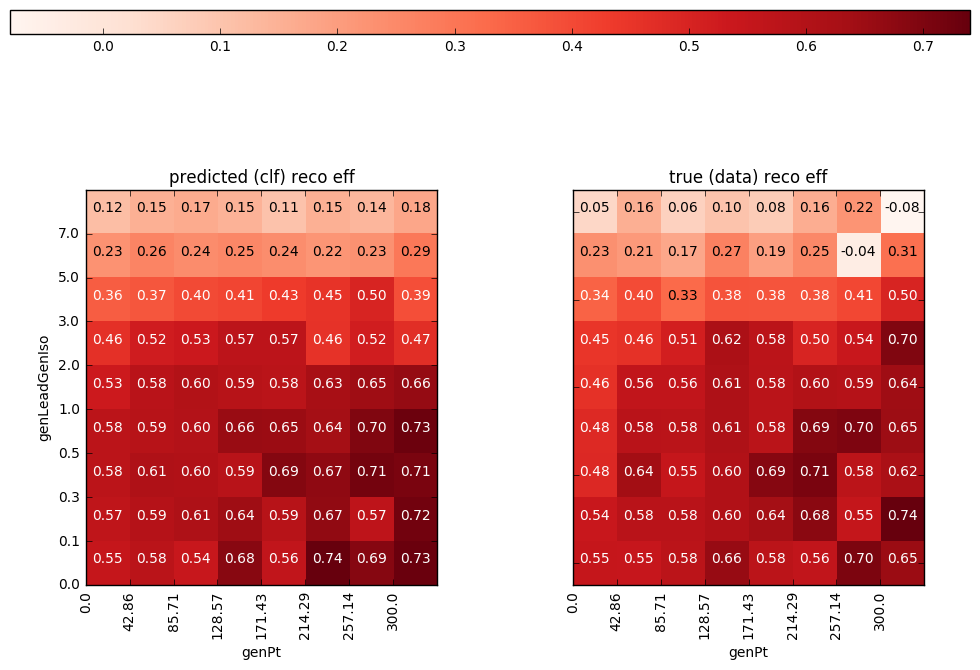

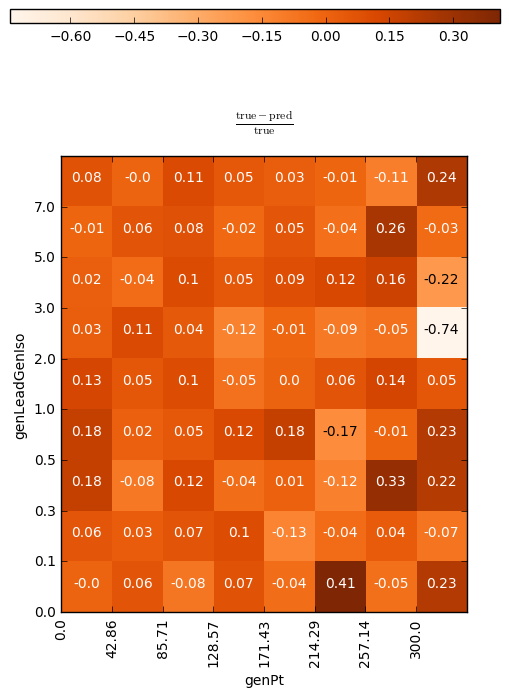

no savepath


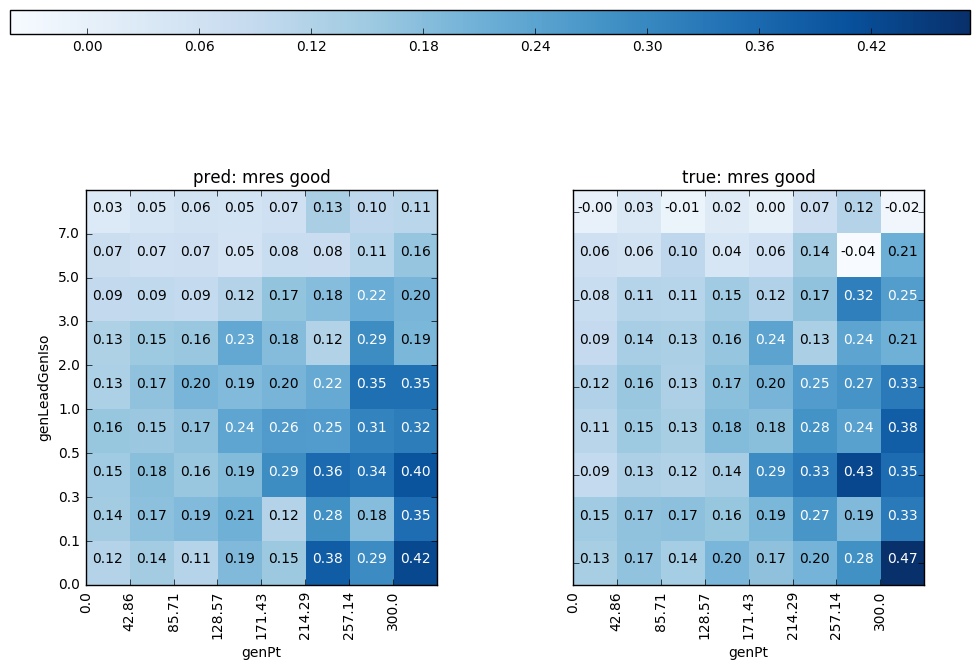

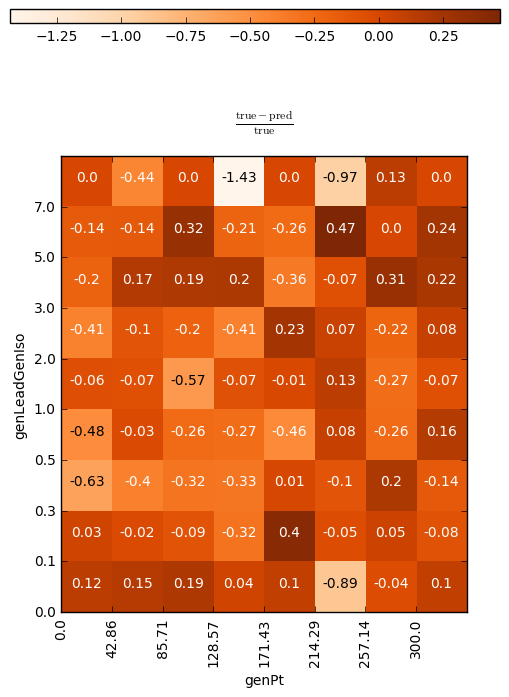

no savepath


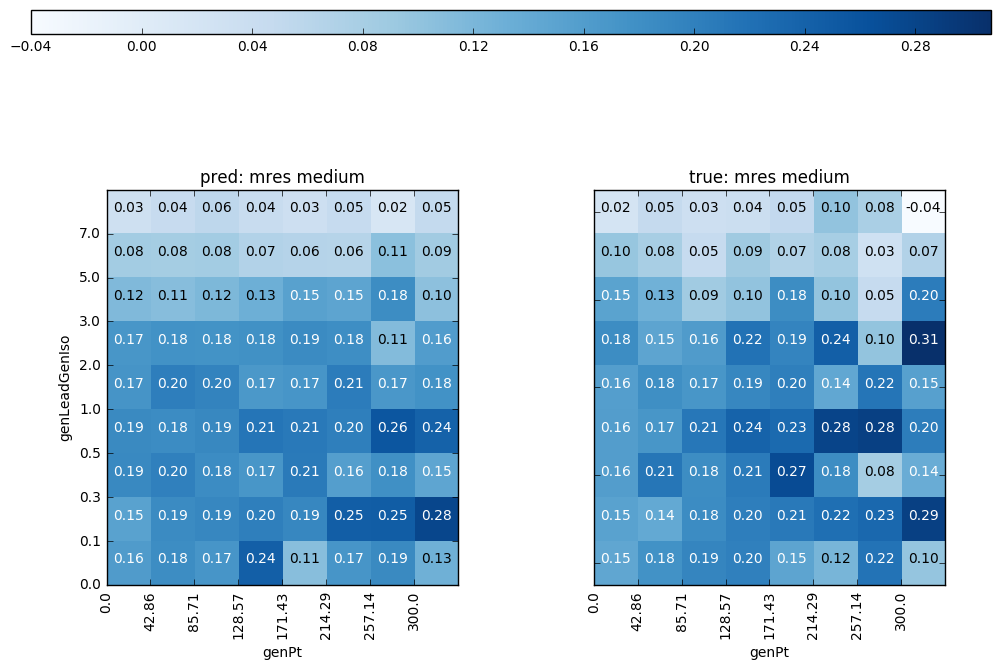

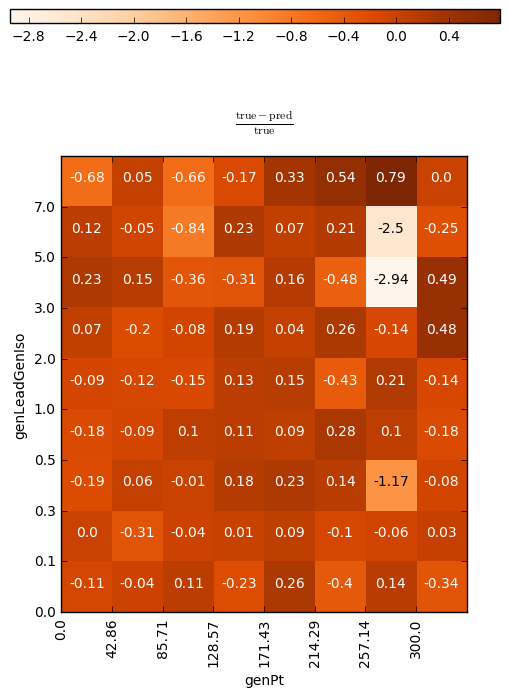

no savepath


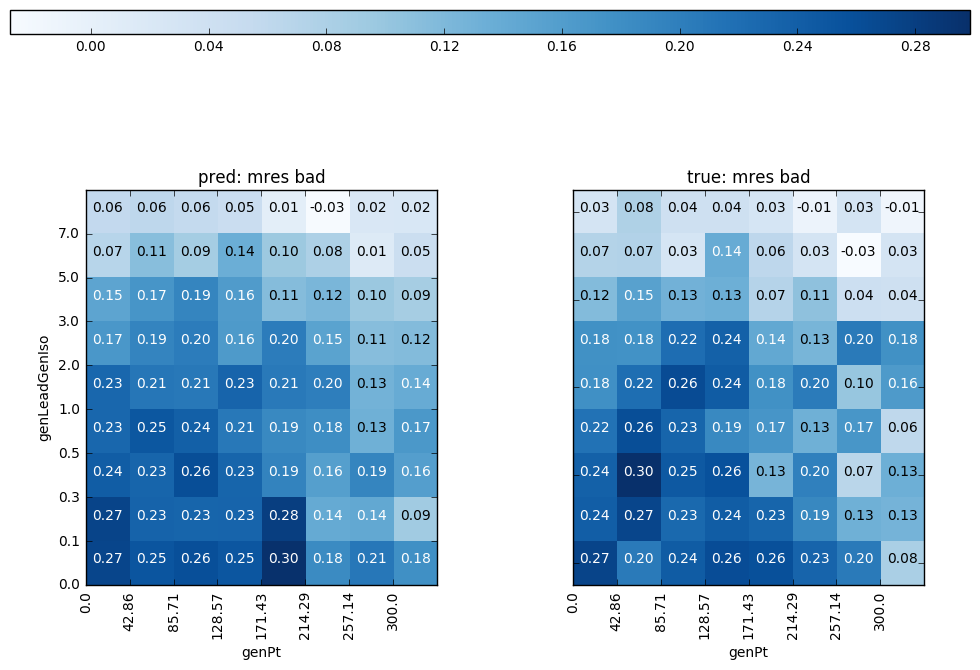

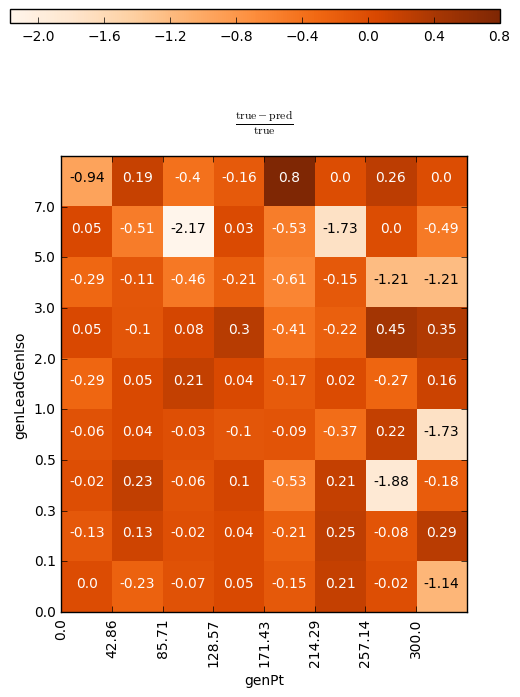

In [16]:
# watch out class 0 correspnds to prob 1
mres = ['good','medium','bad']
for i in np.arange(0,4,1) :
    #print i
    gb_freq  = df_ttH.groupby([x_var+'Bin',y_var+'Bin']).apply(weight_freq,"class",(i-1),'weight')
    gb_proba = df_ttH_test.groupby([x_var+'Bin',y_var+'Bin']).apply(weighted_average, 'class_prob_'+str(i),'weight')
    if (i == 0) :
        effplt.plot_imshow([gb_proba,gb_freq],binBoundaries=bins_dict, x_lab=x_var,y_lab=y_var,titles=['pred','true'],
                            savepath=savePath+saveName+'reco_eff',
                           effTag=True)
    else :
        effplt.plot_imshow([gb_proba,gb_freq],binBoundaries=bins_dict, x_lab=x_var,y_lab=y_var,
                           titles=['pred: mres '+mres[i-1],'true: mres '+mres[i-1]],
                            savepath=savePath+saveName+'mres_'+mres[i-1],
                           effTag=False)

